# Spotify Data
- An exploration of general Spotify data as practise for data analysis
- Analysis and visualisation where possible of my own personal 'Your Top Songs' playlists. 

In [212]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [213]:
df = pd.read_csv('/users/aoifesullivan/Downloads/dataset.csv')
pd.set_option('display.max_columns', None)
df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [214]:
df.groupby('track_genre')

In [215]:
df.track_genre.value_counts()

acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: track_genre, Length: 114, dtype: int64

In [216]:
df.loc[df.explicit==True].track_genre.value_counts()

comedy      656
emo         465
sad         450
j-dance     391
hardcore    325
           ... 
guitar        2
pop-film      1
opera         1
j-idol        1
disney        1
Name: track_genre, Length: 106, dtype: int64

In [217]:
df.shape

(114000, 21)

In [218]:
#just the length of the data set for percentages or whatever
df_count = df.shape[0]

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

*A few ideas of things to work out:*
- Top 10 most popular tracks
- Top 10 most popular artists
- Top 10 most popular genres
- Correlation btween danceability and energy
- Least popular songs graphed by genre
- Most common time signature - graph it by frequency
- Explicit vs non explicit percent - most and least explicit genre

In [220]:
#pd.isna(df) #boolean masks if there are nulls or not
#pd.isna(df).sum() # shows the columns where the nulls are
pd.isna(df).sum().sum() #shows the total number of all missing values in the dataset, which is 3.


3

In [221]:
#How many unique artists are there
artists = df[['artists']]
artists

,artists
0,Gen Hoshino
1,Ben Woodward
2,Ingrid Michaelson;ZAYN
3,Kina Grannis
4,Chord Overstreet
...,...
113995,Rainy Lullaby
113996,Rainy Lullaby
113997,Cesária Evora
113998,Michael W. Smith


In [222]:
#Preview of all the genres, out of interest
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [223]:
# Most frequently seen artist in df
artists.value_counts()

artists                 
The Beatles                 279
George Jones                271
Stevie Wonder               236
Linkin Park                 224
Ella Fitzgerald             222
                           ... 
Mother Love Bone              1
DubVision;Afrojack            1
Dub Pistols;Too Many T's      1
Mothership                    1
DJ Mongoose                   1
Length: 31437, dtype: int64

## Explicit content exploration.
Covering the following: 
1. Total tracks in the dataset : 114000
2. Total tracks that are explicit : 9747
3. Total percent of tracks that are explicit: 8.55%
4. Total percent of tracks that are explicit by genre: under the variable most_explicit_order as a series
5. Most explicit genre: Comedy (with 65.6% of tracks being explicit)
6. How many genres have no instances of being explicit in the df: 8
7. List of genres that have no instances of being explicit: ['children', 'classical', 'gospel', 'honky-tonk', 'sleep', 'study','tango', 'world-music']
8. List of genres that are more explicit than total across all genres (bonus if you can be bothered to attempt to chart them) 

In [224]:
#1. 

#How many tracks are there in total
df.shape

(114000, 21)

In [225]:
# Markus Version of Bla
df['explicit'].value_counts()[True]

9747

In [226]:
# Markus Version of Bla
df['explicit'].value_counts()

False    104253
True       9747
Name: explicit, dtype: int64

In [227]:
#2.

#How many tracks are explicit
filt = df['explicit'] == True
explicit = df.loc[filt, 'explicit']
count_explicit = explicit.value_counts().item()
count_explicit

9747

In [228]:
#3.

#Total percent of tracks that are explicit
total_percent_explicit = (count_explicit / df_count) * 100
#total_percent_explicit.dtype
total_percent_explicit

8.55

How many tracks are explicit compared to the total amount - percentage

In [229]:
#create a filter to pull only rows that are counted as explicit
only_explicit = df.loc[filt]

In [230]:
#Make 2 groupbys, one is for grouping by genre, one is for grouping by genre with the explicit only filter

groupby_genre = df.groupby(['track_genre'])
explicit_groupby_genre = only_explicit.groupby(['track_genre'])
groupby_genre.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.90500,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113005,113005,40lKptao1hxVqA7fd1OOGp,Chris Tomlin,And If Our God Is For Us...,Our God,63,285160,False,0.509,0.7780,11,-3.608,1,0.0295,0.00998,0.000000,0.1900,0.2160,105.066,4,world-music
113006,113006,6aRwLqDf1bN3lI2gMd6wXp,Passion;Kristian Stanfill,Passion: Let The Future Begin,In Christ Alone - Live,57,339493,False,0.378,0.5960,5,-5.406,1,0.0323,0.01820,0.000011,0.1440,0.1720,135.968,3,world-music
113007,113007,1QoQC9g6R0K1SrPQifxaWB,Hillsong Worship;Brooke Ligertwood,Who You Say I Am,Who You Say I Am,56,198704,False,0.377,0.6440,6,-8.139,1,0.0404,0.00410,0.000000,0.0890,0.2990,171.908,3,world-music
113008,113008,4ElNxglBjcrASiGn58t9Jm,for KING & COUNTRY,Burn The Ships,God Only Knows,64,229760,False,0.597,0.4170,2,-7.952,1,0.0502,0.39500,0.000008,0.1280,0.2630,143.839,4,world-music


In [231]:
track_count_by_genre = groupby_genre.size()
track_count_by_genre.sort_values(ascending = False)

track_genre
acoustic             1000
punk                 1000
progressive-house    1000
power-pop            1000
pop-film             1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Length: 114, dtype: int64

In [232]:
explicit_track_count_by_genre = explicit_groupby_genre.size()
explicit_track_count_by_genre.sort_values(ascending = False)

track_genre
comedy      656
emo         465
sad         450
j-dance     391
hardcore    325
           ... 
cantopop      2
opera         1
disney        1
pop-film      1
j-idol        1
Length: 106, dtype: int64

In [233]:
#This
df.groupby(['track_genre', 'explicit']).size()
#and this
explicit_by_genre = groupby_genre['explicit'].value_counts()
explicit_by_genre
#seem to serve the same purpose, except 2nd one hasa variable

track_genre  explicit
acoustic     False        948
             True          52
afrobeat     False        982
             True          18
alt-rock     False        944
                         ... 
trip-hop     False        955
             True          45
turkish      False        782
             True         218
world-music  False       1000
Name: explicit, Length: 220, dtype: int64

So now I knw the most explicit is comedy, and the many least are tango, sleep etc. 

In [234]:
#4.

#Total percent of tracks that are explicit by genre

explicit_percent = explicit_track_count_by_genre / track_count_by_genre * 100
most_explicit_order = explicit_percent.sort_values(ascending = False)
most_explicit_order.head(50)

track_genre
comedy         65.6
emo            46.5
sad            45.0
j-dance        39.1
hardcore       32.5
hip-hop        31.9
funk           30.4
dancehall      30.2
metalcore      29.1
death-metal    25.1
latino         24.9
industrial     23.6
french         21.9
turkish        21.8
reggaeton      21.2
dance          17.4
chill          17.1
reggae         16.7
alternative    16.4
electro        15.3
grindcore      15.3
metal          14.2
latin          13.3
black-metal    13.1
german         12.7
happy          12.6
electronic     12.0
house          10.7
indie-pop      10.7
edm            10.6
punk           10.6
soul           10.4
groove          9.7
hardstyle       9.6
swedish         9.5
dubstep         9.5
garage          9.5
r-n-b           8.8
brazil          8.6
club            8.5
indie           8.4
heavy-metal     8.3
iranian         8.0
punk-rock       8.0
pop             7.4
dub             7.4
grunge          7.2
goth            6.6
alt-rock        5.6
anime   

In [235]:
most_explicit_order.dtype

dtype('float64')

In [236]:
#5. 

#Most explicit genre

print('The most explicit genre has a', most_explicit_order[0], '% likelihood of being explicit', 'and it is', most_explicit_order.index[0])

The most explicit genre has a 65.60000000000001 % likelihood of being explicit and it is comedy


In [237]:
#6. 

#How many genres have no instances of being explicit
num_nan = most_explicit_order.isnull()
#num_nan = most_explicit_order.isnull().sum()
num_nan

track_genre
comedy         False
emo            False
sad            False
j-dance        False
hardcore       False
               ...  
honky-tonk      True
sleep           True
study           True
tango           True
world-music     True
Length: 114, dtype: bool

In [238]:
most_explicit_order.index

Index(['comedy', 'emo', 'sad', 'j-dance', 'hardcore', 'hip-hop', 'funk',
       'dancehall', 'metalcore', 'death-metal',
       ...
       'pop-film', 'j-idol', 'children', 'classical', 'gospel', 'honky-tonk',
       'sleep', 'study', 'tango', 'world-music'],
      dtype='object', name='track_genre', length=114)

In [239]:
#7.

#And which ones are they? 
non_explicit_genres = most_explicit_order.loc[num_nan].index
non_explicit_genres

Index(['children', 'classical', 'gospel', 'honky-tonk', 'sleep', 'study',
       'tango', 'world-music'],
      dtype='object', name='track_genre')

In [240]:
#8.

#And lastly - which genres are more explicit and less explicit than the average of 8.5%?

# variable with the average = total_percent_explicit 
# series with percents = most_explicit_order


df_genre_percent = pd.DataFrame(most_explicit_order, columns = (['percent']))
df_genre_percent.reset_index(inplace = True)

df_genre_percent.head(20)

,track_genre,percent
0,comedy,65.6
1,emo,46.5
2,sad,45.0
3,j-dance,39.1
4,hardcore,32.5
5,hip-hop,31.9
6,funk,30.4
7,dancehall,30.2
8,metalcore,29.1
9,death-metal,25.1


In [241]:
filt_higher_than = (df_genre_percent['percent'] > 8.55)
df_genre_percent[filt_higher_than].head(5)
#Question: I have 8.55 written there, but can't replace it with the variable total_percent_explicit

,track_genre,percent
0,comedy,65.6
1,emo,46.5
2,sad,45.0
3,j-dance,39.1
4,hardcore,32.5


In [242]:
# what markuss would du (simplified of below)
df_genre_percent['is_it_average'] = df_genre_percent['percent'].apply(lambda percent: 'above_avg' if percent >= total_percent_explicit
                                                   else 'below_avg')

In [243]:
#Try to get an additional column on if it's above or below average, and saving it to the initial df
df_genre_percent = df_genre_percent.assign(is_it_average = df_genre_percent['percent'].apply(lambda percent: 'above_avg' if percent >= total_percent_explicit
                                                   else 'below_avg'))

In [244]:
df_genre_percent

,track_genre,percent,is_it_average
0,comedy,65.6,above_avg
1,emo,46.5,above_avg
2,sad,45.0,above_avg
3,j-dance,39.1,above_avg
4,hardcore,32.5,above_avg
...,...,...,...
109,honky-tonk,NaN,below_avg
110,sleep,NaN,below_avg
111,study,NaN,below_avg
112,tango,NaN,below_avg


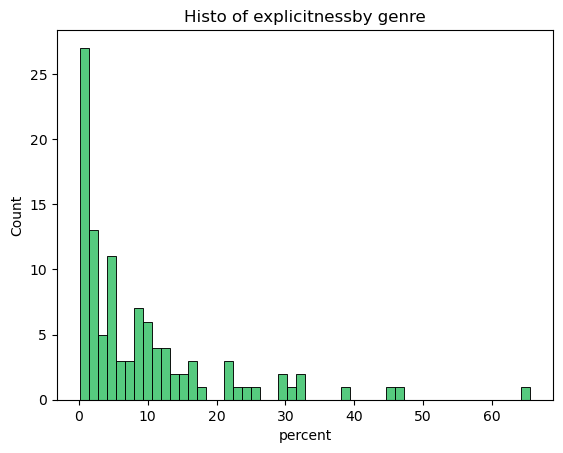

In [245]:
sns.histplot(df_genre_percent["percent"], color = '#1DB954', bins = 50, legend = True).set_title("Histo of explicitnessby genre")
plt.show()
# would like to have an average line here to show distribution but whatever for now.b

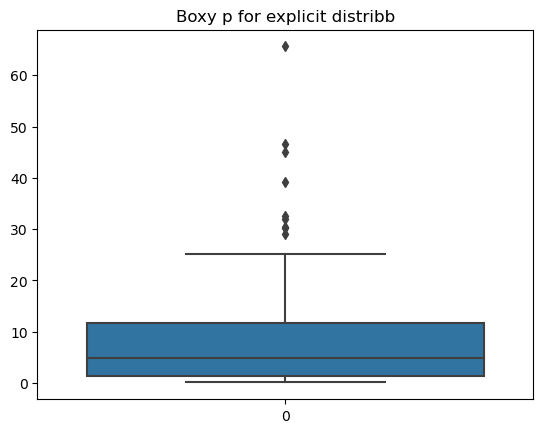

In [246]:
sns.boxplot(data = df_genre_percent["percent"]).set_title("Boxy p for explicit distribb")
plt.show()
#not super useful but wanted to try it out. 

This is nothing really, just trying out a diferent histplot.

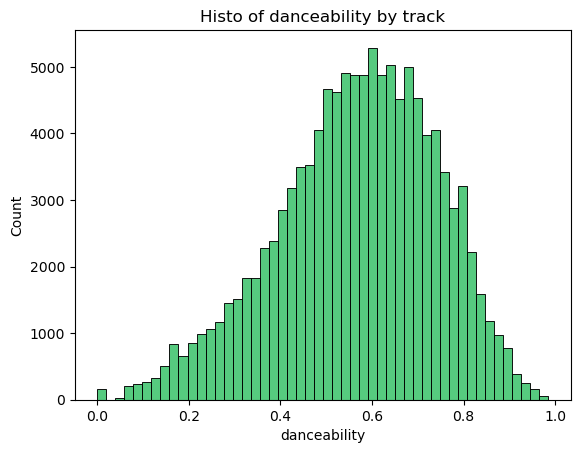

In [247]:
sns.histplot(df["danceability"], color = '#1DB954', bins = 50).set_title("Histo of danceability by track")
plt.show()

# Personal Spotify Data analysis (Your Top Songs)

### Comparing the change in my Spotify top playlists over the past few years.

2022: 37i9dQZF1F0sijgNaJdgit
2021: spotify:playlist:37i9dQZF1EUMDoJuT8yJsl
some are randomly not working, so the one in the dataset now is 'singing'

In [248]:
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '4ba78ea5e22946bc84446f9bb9ca0d9c'
client_secret = 'e9686ac736484d20a1c13ceff2c386ae'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlist_id = 'spotify:playlist:3iL5Fg17rPVwZUqw4T4xCT' # singing playlist
results = sp.playlist(playlist_id)

In [249]:
ids=[]

for item in results['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
        
song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

for song_id in ids:
    # get song's meta data
    meta = sp.track(song_id)
    
    # song id
    song_meta['id'].append(song_id)

    # album name
    album=meta['album']['name']
    song_meta['album']+=[album]

    # song name
    song=meta['name']
    song_meta['name']+=[song]
    
    # artists name
    s = ', '
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist']+=[artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit=meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # song popularity
    popularity=meta['popularity']
    song_meta['popularity'].append(popularity)

song_meta_df=pd.DataFrame.from_dict(song_meta)

# check the song feature
features = sp.audio_features(song_meta['id'])
# change dictionary to dataframe
features_df=pd.DataFrame.from_dict(features)

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# combine two dataframes
final_df=song_meta_df.merge(features_df)

In [250]:
final_df.head(20)

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,33WV1lT63pq12t9jlyrxlW,Tape Deck Heart (Deluxe Edition),The Way I Tend To Be,Frank Turner,False,45,0.583,0.911,11,-3.579,1,0.0344,0.14000,0.000000,0.2730,0.826,86.177,audio_features,spotify:track:33WV1lT63pq12t9jlyrxlW,https://api.spotify.com/v1/tracks/33WV1lT63pq1...,https://api.spotify.com/v1/audio-analysis/33WV...,3.688217,4
1,0w8URikbJO3RL4r1kiAROc,England Keep My Bones (Deluxe Edition),Peggy Sang The Blues,Frank Turner,False,33,0.585,0.768,0,-5.254,1,0.0346,0.04660,0.000000,0.1010,0.638,91.033,audio_features,spotify:track:0w8URikbJO3RL4r1kiAROc,https://api.spotify.com/v1/tracks/0w8URikbJO3R...,https://api.spotify.com/v1/audio-analysis/0w8U...,3.546217,4
2,0Zf5BJahvBQ6yLoCR6fPko,Music For The Motion Picture Into The Wild,Hard Sun,Eddie Vedder,False,0,0.441,0.828,8,-6.544,1,0.0331,0.05330,0.000328,0.3250,0.643,143.395,audio_features,spotify:track:0Zf5BJahvBQ6yLoCR6fPko,https://api.spotify.com/v1/tracks/0Zf5BJahvBQ6...,https://api.spotify.com/v1/audio-analysis/0Zf5...,5.362667,4
3,300RfAPZ57B0y6YYj9n6DN,Number Ones,Superstition - Single Version,Stevie Wonder,False,5,0.642,0.735,8,-8.866,1,0.0806,0.01720,0.000733,0.0391,0.864,99.682,audio_features,spotify:track:300RfAPZ57B0y6YYj9n6DN,https://api.spotify.com/v1/tracks/300RfAPZ57B0...,https://api.spotify.com/v1/audio-analysis/300R...,4.080450,4
4,6kuqHs2ijp5D8tj0XokQQo,A Dotted Line,Destination,Nickel Creek,False,46,0.515,0.444,0,-8.847,0,0.0296,0.46000,0.000038,0.1000,0.692,145.900,audio_features,spotify:track:6kuqHs2ijp5D8tj0XokQQo,https://api.spotify.com/v1/tracks/6kuqHs2ijp5D...,https://api.spotify.com/v1/audio-analysis/6kuq...,3.854000,4
5,1Gc7RYb9EcdkeboN5wIXtD,Croweology,Soul Singing,The Black Crowes,False,0,0.375,0.623,5,-11.422,1,0.0369,0.03880,0.000083,0.2160,0.590,169.014,audio_features,spotify:track:1Gc7RYb9EcdkeboN5wIXtD,https://api.spotify.com/v1/tracks/1Gc7RYb9Ecdk...,https://api.spotify.com/v1/audio-analysis/1Gc7...,4.251783,4
6,1oT20g6f8rvymheUIdFr19,The Real Deal: Greatest Hits Volume 1,Pride and Joy,Stevie Ray Vaughan,False,51,0.426,0.693,8,-9.759,1,0.0377,0.02510,0.006500,0.1010,0.751,126.804,audio_features,spotify:track:1oT20g6f8rvymheUIdFr19,https://api.spotify.com/v1/tracks/1oT20g6f8rvy...,https://api.spotify.com/v1/audio-analysis/1oT2...,3.664000,4
7,6oI3Inlpzlik5e7cy4Sdi8,Shallow Grave,The Gardener,The Tallest Man On Earth,False,0,0.496,0.533,3,-4.979,0,0.0264,0.92800,0.000000,0.1310,0.415,95.477,audio_features,spotify:track:6oI3Inlpzlik5e7cy4Sdi8,https://api.spotify.com/v1/tracks/6oI3Inlpzlik...,https://api.spotify.com/v1/audio-analysis/6oI3...,3.950000,4
8,3SXsoJxUF3C9XjZnGMZbXn,The Wild Hunt,King of Spain,The Tallest Man On Earth,False,0,0.385,0.493,8,-8.342,1,0.0344,0.75700,0.000002,0.1160,0.375,131.615,audio_features,spotify:track:3SXsoJxUF3C9XjZnGMZbXn,https://api.spotify.com/v1/tracks/3SXsoJxUF3C9...,https://api.spotify.com/v1/audio-analysis/3SXs...,3.436450,4
9,7i5NbxA7ONWkmjtW2kXdQP,The Wild Hunt,The Wild Hunt,The Tallest Man On Earth,False,0,0.569,0.397,9,-10.183,1,0.0302,0.85000,0.000002,0.1100,0.520,101.116,audio_features,spotify:track:7i5NbxA7ONWkmjtW2kXdQP,https://api.spotify.com/v1/tracks/7i5NbxA7ONWk...,https://api.spotify.com/v1/audio-analysis/7i5N...,3.360000,4


In [251]:
music_feature=final_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness'
                          , 'valence', 'tempo', 'duration_ms']]
print(music_feature)

    danceability  energy  loudness  speechiness  acousticness  \
0          0.583   0.911    -3.579       0.0344       0.14000   
1          0.585   0.768    -5.254       0.0346       0.04660   
2          0.441   0.828    -6.544       0.0331       0.05330   
3          0.642   0.735    -8.866       0.0806       0.01720   
4          0.515   0.444    -8.847       0.0296       0.46000   
5          0.375   0.623   -11.422       0.0369       0.03880   
6          0.426   0.693    -9.759       0.0377       0.02510   
7          0.496   0.533    -4.979       0.0264       0.92800   
8          0.385   0.493    -8.342       0.0344       0.75700   
9          0.569   0.397   -10.183       0.0302       0.85000   
10         0.597   0.118   -13.908       0.0358       0.96400   
11         0.701   0.803    -6.786       0.0545       0.05440   
12         0.670   0.619   -10.365       0.0323       0.05140   
13         0.552   0.213   -13.522       0.0285       0.79600   
14         0.315   0.715 

In [252]:
type(music_feature)

pandas.core.frame.DataFrame

In [253]:
music_feature.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.574852,0.602815,-8.472889,0.055481,0.329998,0.002211,0.177081,0.595593,121.435815,3.976352
std,0.142590,0.188076,2.814412,0.050237,0.332582,0.006219,0.153228,0.228499,29.718340,0.754527
min,0.314000,0.118000,-13.908000,0.026400,0.001250,0.000000,0.039100,0.161000,74.968000,2.675000
25%,0.490500,0.513000,-10.183500,0.033750,0.049200,0.000002,0.099750,0.425000,97.579500,3.557108
50%,0.585000,0.619000,-8.211000,0.035900,0.140000,0.000023,0.116000,0.636000,122.043000,3.769333
75%,0.656000,0.743000,-6.665000,0.059950,0.580000,0.000531,0.216000,0.803500,144.459000,4.347225
max,0.842000,0.911000,-3.579000,0.268000,0.964000,0.028600,0.700000,0.916000,189.901000,5.955950


In [271]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
music_feature.loc[:]=scaler.fit_transform(music_feature)

In [272]:
print(type(music_feature))

<class 'numpy.ndarray'>


In [270]:
print(music_feature)

    danceability    energy  loudness  speechiness  acousticness  \
0       0.509470  1.000000  1.000000     0.033113      0.144118   
1       0.513258  0.819672  0.837835     0.033940      0.047105   
2       0.240530  0.895334  0.712944     0.027732      0.054064   
3       0.621212  0.778058  0.488140     0.224338      0.016567   
4       0.380682  0.411097  0.489980     0.013245      0.476500   
5       0.115530  0.636822  0.240682     0.043460      0.039003   
6       0.212121  0.725095  0.401685     0.046772      0.024773   
7       0.344697  0.523329  0.864459     0.000000      0.962607   
8       0.134470  0.472888  0.538871     0.033113      0.784991   
9       0.482955  0.351828  0.360635     0.015728      0.881589   
10      0.535985  0.000000  0.000000     0.038907      1.000000   
11      0.732955  0.863808  0.689515     0.116308      0.055206   
12      0.674242  0.631778  0.343015     0.024421      0.052090   
13      0.450758  0.119798  0.037371     0.008692      0.82550

Could also possibly have used a lamda for rescale as seen here: https://www.python-graph-gallery.com/web-radar-chart-with-matplotlib

In [256]:
import math
print(math.pi)
pi = (math.pi)

3.141592653589793


In [257]:
from matplotlib.lines import Line2D

Found out after doing the above that numpy already has pi saved. So can just:
np.pi
Ah well. 

In [264]:
# convert column names into a list to use for labels
categories=list(music_feature.columns)
# number of categories
N=len(categories)
# create a list with the average of all features
value=list(music_feature.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*pi for n in range(N)]
angles+=angles[:1]

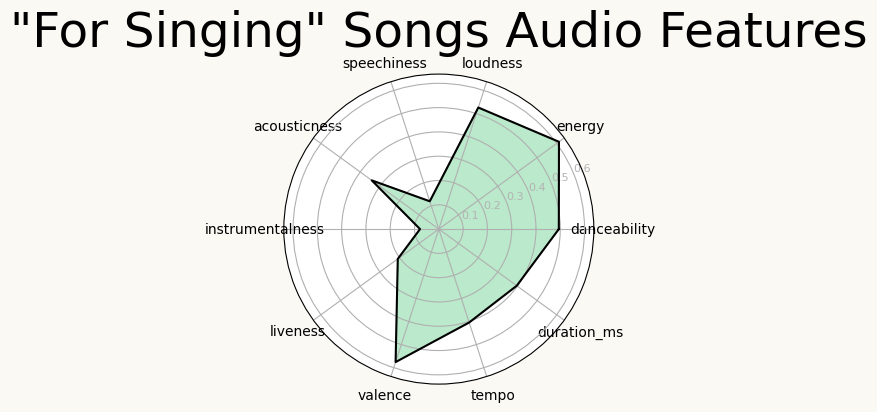

In [287]:
fig=plt.figure(figsize=(4,5))
#ax =fig.add_subplot(111, polar=True) # i can't see that this made any difference
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(1)

ax.plot(angles, value, linewidth=4)
ax.scatter(angles, value, s=160, zorder=10)

# plot
plt.polar(angles, value, color = '#000000')
plt.fill(angles,value,alpha=0.3, color = "#1DB954")

plt.title('"For Singing" Songs Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=10)
plt.yticks(color = "#b3b3b3", size=8)
X_VERTICAL_TICK_PADDING = 1
X_HORIZONTAL_TICK_PADDING = 50 
plt.show()

I tried a bunch of other things and none of it worked, so going back to trying to customise the one above - the screenshot from the tutorial shows labels of the lategory, but mine doesn't, and also changing the colours the way I did it really failed!
Ok success above, I think I get most of it now, although still struggling to understand this exact bit of code: 
music_feature.loc[:]=scaler.fit_transform(music_feature)

There's a warning for that way of doing it, because it's a subset (?) however if I exclude it it doesn't work properly at all. If it's something to do with datatype (one is a df and one is an array) then I still don't really get it as when I tried to change the datatype it still didn't work. 